In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from skimage import io

**1**. (10 points)

Given the following covariance matrix
```python
A = np.array([[2,1],[1,4]])
```

1. Show that the eigenvectors of $A$ are orthogonal. 
2. What is the vector representing the first principal component direction? 
3. Find $A^{-1}$ without performing a matrix inversion. 
4. What are the coordinates of the data points (0, 1) and (1, 1) in the standard basis expressed as coordinates of the principal components? 
5. What is the proportion of variance explained if we keep only the projection onto the first principal component? 

In [2]:
import numpy as np
import scipy.linalg as la

In [3]:
A = np.array([[2,1],[1,4]])

In [4]:
e, v = la.eig(A)
v[0].dot(v[1])

0.0

In [5]:
v[:, e.argmax()]

array([-0.38268343, -0.92387953])

In [6]:
e = np.real_if_close(e)
Ainv = v.dot(np.diag(1/e).dot(v.T))
Ainv

array([[ 0.57142857, -0.14285714],
       [-0.14285714,  0.28571429]])

In [7]:
Ainv @ A

array([[1.00000000e+00, 0.00000000e+00],
       [5.55111512e-17, 1.00000000e+00]])

In [8]:
v.T @ np.array([0,1]).reshape(-1,1)

array([[ 0.38268343],
       [-0.92387953]])

In [9]:
 v.T @  np.array([1,1]).reshape(-1,1)

array([[-0.5411961 ],
       [-1.30656296]])

In [10]:
e.max()/e.sum()

0.7357022603955158

**2**. (10 points)

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformation. (2 points)

2. Compute the rank of $A$ (use any method you like). (2 points)

3. Find the eigenvalues and eigenvectors of $A$. (2 points)

4. What is the matrix representation of $f$ with respect to the eigenvectors? (4 points)

In [11]:
A = np.array([
    [10, 2, 1],
    [-10, -5, -4],
    [16, 20, 13],
])

A.dot(np.eye(3))

array([[ 10.,   2.,   1.],
       [-10.,  -5.,  -4.],
       [ 16.,  20.,  13.]])

In [12]:
np.linalg.matrix_rank(A)

3

In [13]:
e, v = la.eig(A)
e = np.real_if_close(e)

In [14]:
e

array([9., 3., 6.])

In [15]:
v

array([[ 5.77350269e-01,  6.31950024e-16, -1.20385853e-01],
       [-5.77350269e-01, -4.47213595e-01, -2.40771706e-01],
       [ 5.77350269e-01,  8.94427191e-01,  9.63086825e-01]])

In [16]:
np.diag(e)

array([[9., 0., 0.],
       [0., 3., 0.],
       [0., 0., 6.]])

**3**. (10 points)


- Find the matrix $A$ that results in rotating the standard vectors in $\mathbb{R}^2$ by 30 degrees counter-clockwise and stretches $e_1$ by a factor of 3 and contracts $e_2$ by a factor of $0.5$. 
- What is the inverse of this matrix? How you find the inverse should reflect your understanding.

The effects of the matrix $A$ and $A^{-1}$ are shown in the figure below:

![image](figs/vecs.png)

In [17]:
theta = 30 * np.pi/180

r = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

In [18]:
s = np.diag([3, 0.5])

In [19]:
m = r @ s

In [20]:
m

array([[ 2.59807621, -0.25      ],
       [ 1.5       ,  0.4330127 ]])

In [21]:
minv = np.diag(1/np.diag(s)) @ r.T

In [22]:
minv

array([[ 0.28867513,  0.16666667],
       [-1.        ,  1.73205081]])

In [23]:
m1 = m @ np.eye(2)

In [24]:
m1

array([[ 2.59807621, -0.25      ],
       [ 1.5       ,  0.4330127 ]])

In [25]:
m2 = minv @ m1

In [26]:
m2

array([[1.00000000e+00, 1.38777878e-17],
       [0.00000000e+00, 1.00000000e+00]])

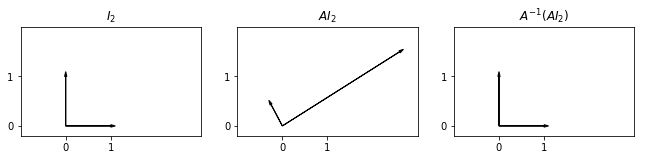

In [27]:
plt.figure(figsize=(11, 2))

plt.subplot(131)
plt.axis([-1, 3, -0.2, 2])
for v in np.eye(2).T:
    plt.arrow(*np.r_[[0,0],v], 
              head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.xticks([0,1])
    plt.yticks([0,1])
plt.title('$I_2$')

plt.subplot(132)
plt.axis([-1, 3, -0.2, 2])
for v in m1.T:
    plt.arrow(*np.r_[[0,0],v], 
              head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.xticks([0,1])
    plt.yticks([0,1])
plt.title('$AI_2$')
    
plt.subplot(133)
plt.axis([-1, 3, -0.2, 2])
for v in m2.T:
    plt.arrow(*np.r_[[0,0],v], 
              head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.xticks([0,1])
    plt.yticks([0,1])
plt.title('$A^{-1}(AI_2)$')
plt.savefig('vecs.png')
pass

**4**. (30 points)


We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$

1. using `scipy.linalg.lstsq` 
2. solving the normal equations $X^TX \beta = X^Ty$ 
3. using `scipy.linalg.svd` 

In each case, plot the data and fitted curve using `matplotlib`.

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

In [28]:
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])

In [29]:
def f(beta, x):
    """Model function."""
    
    return beta[0]*x**2 + beta[1]*x**3 + beta[2]*np.sin(x)

**Using `lstsq`**

In [30]:
X = np.c_[x**2, x**3, np.sin(x)]

In [31]:
beta = np.linalg.lstsq(X, y, rcond=None)[0]

In [32]:
beta

array([ 2.99259014, -0.19883227, 10.20024689])

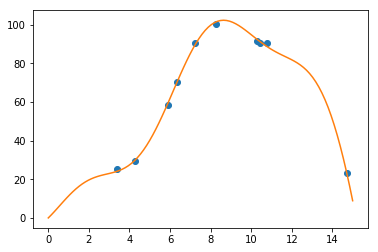

In [33]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

**Using normal equations**

In [34]:
beta = np.linalg.solve(X.T @ X, X.T @ y)
beta

array([ 2.99259014, -0.19883227, 10.20024689])

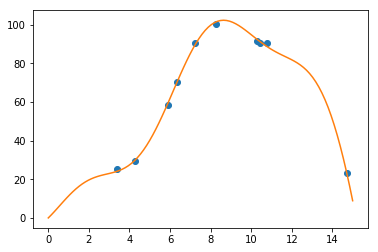

In [35]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

**Using SVD**

In [36]:
U, s, Vt = np.linalg.svd(X)
beta = Vt.T @ np.diag(1/s) @ U[:, :len(s)].T @ y.reshape(-1,1)
beta

array([[ 2.99259014],
       [-0.19883227],
       [10.20024689]])

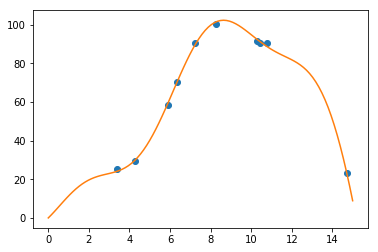

In [37]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

**5**. (40 points)

Read in `figs/elephant.jpg` as a gray-scale image. The image has $1066 \times 1600$ values. Using SVD, recreate the image with a relative error of less than 0.5%. What is the relative size of the compressed image as a percentage?

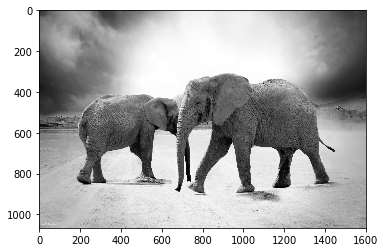

In [38]:
img = io.imread('figs/elephant.jpg', as_gray=True)
plt.imshow(img, cmap='gray')
pass

In [39]:
img.shape

(1066, 1600)

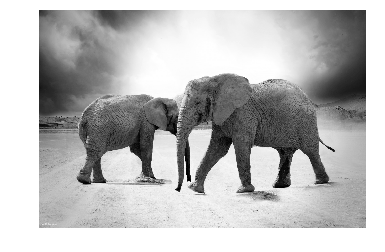

In [40]:
plt.imshow(img, cmap='gray')
plt.gcf().set_frameon(False)
plt.gca().set_axis_off()
pass

In [41]:
U, S, V = la.svd(img)

In [42]:
U.shape, S.shape, V.shape

((1066, 1066), (1066,), (1600, 1600))

In [43]:
k = np.sum(np.cumsum((S**2)/(S**2).sum()) <= 0.995)

In [44]:
i = U[:,:k] @ np.diag(S[:k])@ V[:k, :]

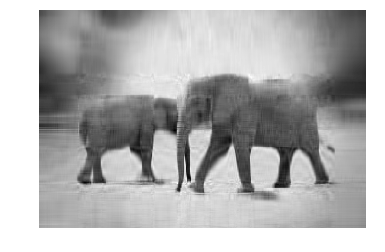

In [45]:
plt.imshow(i, cmap='gray')
plt.gcf().set_frameon(False)
plt.gca().set_axis_off()
pass

In [46]:
space = U.shape[0]*k + k + k*V.shape[1]
100.0 * space / np.prod(img.shape)

3.12734521575985

In [48]:
k/len(s)

6.666666666666667

In [49]:
k

20